In [0]:
import os
import tensorflow as tf
import pickle
import numpy as np
import pandas as pd
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
from os import listdir
from os.path import isfile, join

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18358426850533070820
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10675481879638477332
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 12306715798292822977
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11281553818
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11816512328194644323
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
!rm -r GAN_project_PUCP/ #borramos en caso quieras comenzar de nuevo


rm: cannot remove 'GAN_project_PUCP/': No such file or directory


In [0]:
!rm -r sample_data/ #borramos en caso quieras comenzar de nuevo

In [0]:
os.listdir('.')

['.config']

In [0]:
!git clone https://github.com/AHuaman/GAN_project_PUCP.git

Cloning into 'GAN_project_PUCP'...
remote: Enumerating objects: 181, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 1299 (delta 40), reused 166 (delta 33), pack-reused 1118
Receiving objects: 100% (1299/1299), 134.39 MiB | 24.08 MiB/s, done.
Resolving deltas: 100% (130/130), done.


In [0]:
import os
os.chdir('GAN_project_PUCP/Midinet_VG/Model_type1')


In [0]:
# finding optimal n for KMEANS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [0]:
flattened_data = data_songs.squeeze().reshape(len(data_songs),16*128)
flattened_data.shape

(11506, 2048)

In [0]:
from sklearn.preprocessing import StandardScaler
song_scaler = StandardScaler().fit(flattened_data)
scaled_songs = song_scaler.transform(flattened_data)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=175)
song_pca = pca.fit(flattened_data)
pca_songs = song_pca.transform(flattened_data)

In [0]:
def projectData(pcaModel, X, K):
    Z = pcaModel.transform(X)[:,:K]
    return Z

In [0]:
def recoverData(pcaModel, Z):
    K = Z.shape[1]
    X_rec = np.dot(Z, pcaModel.components_[:K,:])
    return X_rec

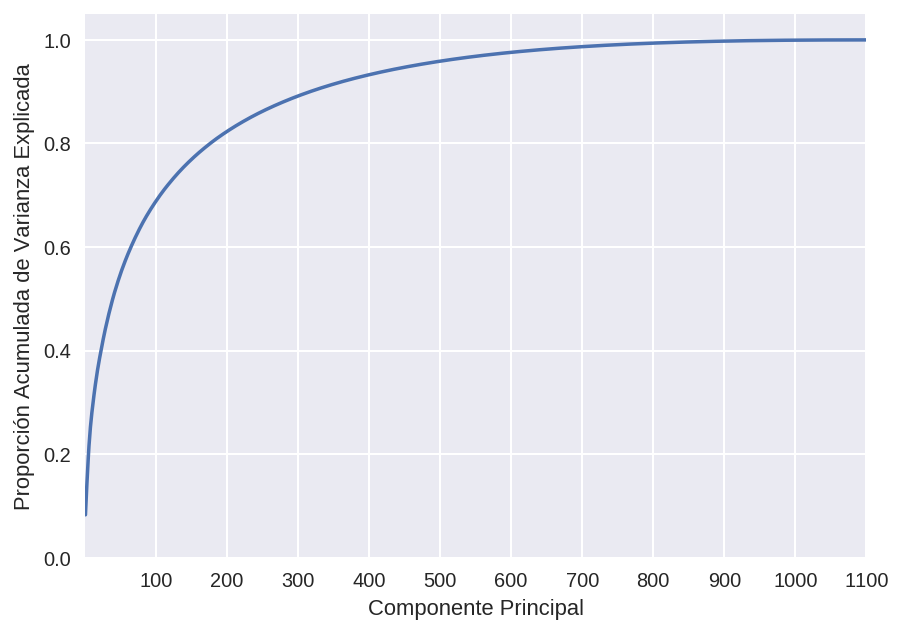

In [0]:

plt.figure(figsize=(7,5))
plt.plot(np.linspace(1,2048,2048), np.cumsum(song_pca.explained_variance_ratio_))
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks(np.linspace(100,1100,11))
plt.show()

In [0]:
clusterer = KMeans(n_clusters=24,init='k-means++',algorithm='full').fit(pca_songs)
clusterer.inertia_

55036.688256541

In [0]:
silhouette_score(pca_songs, clusterer.labels_)

0.1491445462450128

In [0]:
for k in set(clusterer.labels_):
  print(k,':',len([x for x in clusterer.labels_ if x==k]))

0 : 103
1 : 695
2 : 794
3 : 293
4 : 93
5 : 223
6 : 492
7 : 125
8 : 5249
9 : 63
10 : 221
11 : 160
12 : 433
13 : 332
14 : 286
15 : 144
16 : 47
17 : 44
18 : 460
19 : 77
20 : 48
21 : 657
22 : 519
23 : 110


In [0]:
n_clusters_arr = list([2**x for x in range(4,12)])
#s_error_arr = []
#silhouette_avg_arr =  []
for n in n_clusters_arr:
  print('Starting kmeans for', n)
  clusterer = KMeans(n_clusters=n,init='k-means++').fit(flattened_data)
  s_error_arr.append(clusterer.inertia_)
  silhouette_avg_arr.append(silhouette_score(flattened_data, clusterer.labels_))
  print('Finished kmeans for', n)

In [0]:
clusterer = KMeans(n_clusters=24,init='k-means++').fit(flattened_data)

In [0]:
silhouette_avg_arr

[0.07308752669031887,
 0.11242967544709428,
 0.18377662152569263,
 0.26702021358665523,
 0.37950599567807275,
 0.498754477107886,
 0.6619118284335185]

In [0]:
s_error_arr


[83069.50542848789,
 71401.93209606149,
 60267.90999109178,
 48344.005953883774,
 35874.20930569094,
 22985.893382900333,
 11851.801990059093]

In [0]:
kmeans_df = pd.DataFrame(data=[[n_clusters_arr[x],s_error_arr[x],silhouette_avg_arr[x]] for x in list(range(0,7))], columns=["n_clusters", "squared_error", "silhouette"])

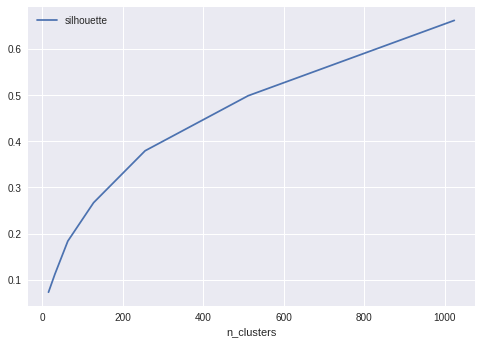

In [0]:
kmeans_df.plot(x='n_clusters',y='silhouette')

In [0]:
set(clusterer.labels_)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23}

In [0]:
with open('pca_kmeans_24.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(clusterer, f, pickle.HIGHEST_PROTOCOL)

In [0]:
song_pca

PCA(copy=True, iterated_power='auto', n_components=175, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
with open('pca_175.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(song_pca, f, pickle.HIGHEST_PROTOCOL)

In [0]:
with open('kmeans_24.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    clusterer = pickle.load(f)

In [0]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [0]:
# folder_id='1uXkcRXuQ5fFG0S8mLW67ewj_jsqAb_Ff'  #carpeta compartida por Sergio

In [0]:

# Para ver los archivos de la carpeta del drive

# file_list = drive.ListFile({'q': "'{0}' in parents and trashed=false".format(folder_id)}).GetList()
# for file1 in file_list:
#   print('title: {0}, id: {1}'.format(file1['title'], file1['id']))

In [0]:
# Descargar toods los arxivos
# for file1 in file_list:
#   file_id=file1['id']
#   file_title = file1['title']
#   drive.CreateFile({'id': file_id}).GetContentFile(file_title)
  data_songs_prev[1][0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
data_songs[0][0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
songs=list(filter(lambda x: 'pickle' in x, listdir('.')))
songs

['song_MSXnem2stg1_5tracks_98measures.pickle',
 'song_B1L_winglancer_area3_2tracks_60measures.pickle',
 'song_wl_boss_1tracks_120measures.pickle',
 'song6_5tracks_72measures.pickle',
 'song_PsyWorld-World2_error.pickle',
 'song_DE-AW2Opening_5tracks_19measures.pickle',
 'song_T_AkumajouDraculaMSX_WickedChild_5tracks_118measures.pickle',
 'song_PC-88__Etrian_Odyssey__Destruction_Begets_Decay__RMABN_Arrangement_error.pickle',
 'song_thxder22_5tracks_60measures.pickle',
 'song_Star_Force_Medley_5tracks_106measures.pickle',
 'song_Ys2-OverDrive_GM-V2_5tracks_49measures.pickle',
 'song_PC-88__Dinosaur__Charge_5tracks_71measures.pickle',
 'song_bombjackmedly_1tracks_98measures.pickle',
 'song_MG2_HOLL_5tracks_202measures.pickle',
 'song_RSETrainerBattle_5tracks_37measures.pickle',
 'song_Ys2-OverDrive_GS-V2_5tracks_49measures.pickle',
 'song_Solid_5tracks_118measures.pickle',
 'song_Battle1_5tracks_54measures.pickle',
 'song_PsyWorld-World6_5tracks_40measures.pickle',
 'song_MKSCMenuext_5tra

In [0]:
data_songs=np.empty((0,16,128), int)
data_songs_prev = np.empty((0,16,128), int)
for song in songs:
    try:  
      song_opened = open(song,"rb")
      song_loaded= pickle.load(song_opened)
      #for 
      #last_track_index = len(song_loaded)-1
      last_track_index = 0
      for i in range(len(song_loaded[last_track_index])):
        if i==0:
          continue
        if (i-1>0):
          prev_bar = bar
        else:
          prev_bar=np.empty((0,128), int)[None]
          for j in song_loaded[last_track_index][i-1]:
            note=np.zeros(128)[None][None]
            if type(j) == type(1.5):
              note[0,0,int(j)] = 1
            prev_bar=np.append(prev_bar,note,axis=1)
        bar=np.empty((0,128), int)[None]
        for j in song_loaded[last_track_index][i]:
          note=np.zeros(128)[None][None]
          if type(j) == type(1.5):
            note[0,0,int(j)] = 1
          bar=np.append(bar,note,axis=1)
          
        
          
        data_songs =np.append(data_songs,bar, axis=0)
        data_songs_prev =np.append(data_songs_prev,prev_bar, axis=0)
      print(np.array(data_songs).shape,'song=',song,np.array(song_loaded).shape)
      print(np.array(data_songs_prev).shape,'song=',song,np.array(song_loaded).shape)
    except:
        print('error parsing')
#data_songs_prev =np.roll(data_songs,1,axis=0)
data_songs=data_songs[None]
data_songs_prev=data_songs_prev[None]

data_songs=np.transpose(data_songs, (1,0,2,3))#Real data, input for model
data_songs_prev=np.transpose(data_songs_prev, (1,0,2,3))#Real data, 1 previous bar, input for model

(97, 16, 128) song= song_MSXnem2stg1_5tracks_98measures.pickle (5, 98, 16)
(97, 16, 128) song= song_MSXnem2stg1_5tracks_98measures.pickle (5, 98, 16)
(156, 16, 128) song= song_B1L_winglancer_area3_2tracks_60measures.pickle (2, 60, 16)
(156, 16, 128) song= song_B1L_winglancer_area3_2tracks_60measures.pickle (2, 60, 16)
(275, 16, 128) song= song_wl_boss_1tracks_120measures.pickle (1, 120, 16)
(275, 16, 128) song= song_wl_boss_1tracks_120measures.pickle (1, 120, 16)
(346, 16, 128) song= song6_5tracks_72measures.pickle (5, 72, 16)
(346, 16, 128) song= song6_5tracks_72measures.pickle (5, 72, 16)
error parsing
(364, 16, 128) song= song_DE-AW2Opening_5tracks_19measures.pickle (5, 19, 16)
(364, 16, 128) song= song_DE-AW2Opening_5tracks_19measures.pickle (5, 19, 16)
(481, 16, 128) song= song_T_AkumajouDraculaMSX_WickedChild_5tracks_118measures.pickle (5, 118, 16)
(481, 16, 128) song= song_T_AkumajouDraculaMSX_WickedChild_5tracks_118measures.pickle (5, 118, 16)
error parsing
(540, 16, 128) song=

In [0]:
np.save('data_songs_500.npy', data_songs[:500], allow_pickle=True, fix_imports=True)
np.save('data_songs_prev_500.npy', data_songs_prev[:500], allow_pickle=True, fix_imports=True)

In [0]:
len(data_songs)

11506

In [0]:
np.save('data_songs.npy', data_songs, allow_pickle=True, fix_imports=True)
np.save('data_songs_prev.npy', data_songs_prev, allow_pickle=True, fix_imports=True)

In [0]:
%pycat model.py

In [0]:
!rm model.py
!rm -r .ipynb_checkpoints

rm: cannot remove '.ipynb_checkpoints': No such file or directory


In [0]:
%%writefile model.py 
from __future__ import division
import os
import time
from glob import glob
import tensorflow as tf
import numpy as np
from six.moves import xrange
# import SharedArray as sa
from sklearn.utils import shuffle
from ops import *
from utils import *
import pickle
import copy

class MidiNet(object): ##Model 1, no 1D conditioner (chords), includes 2D conditioner (previous melody)
    def __init__(self, sess, is_crop=False,
                 batch_size=120, sample_size = 120, 
                 output_w=16,output_h=128, #typical midi bar dimensions
                 prev_dim=1, #prev_dim refers to TRUE: using 2d melody.
                 z_dim=100, gf_dim=64, #dimension of convlutions considering feature matching
                 df_dim=64, #dimension of convlutions considering feature matching
                 c_dim=1, #channels: 1
                 dataset_name='default',
                 checkpoint_dir=None, 
                 sample_dir=None, gen_dir= None): #These should indicate the folders for export and saving
        self.sess = sess
        self.k = 24 # kmeans
        self.is_crop = is_crop
        self.batch_size = batch_size
        self.sample_size = sample_size
        self.output_w = output_w
        self.output_h = output_h

        self.prev_dim = prev_dim
        self.z_dim = z_dim

        self.gf_dim = gf_dim
        self.df_dim = df_dim
        
        self.c_dim = c_dim

        # batch normalization : deals with poor initialization helps gradient flow
        self.d_bn0 = batch_norm(name='d_bn0')
        self.d_bn1 = batch_norm(name='d_bn1')
        self.d_bn2 = batch_norm(name='d_bn2')
        self.d_bn3 = batch_norm(name='d_bn3')


        if self.prev_dim:
            self.g_prev_bn0 = batch_norm(name='g_prev_bn0')
            self.g_prev_bn1 = batch_norm(name='g_prev_bn1')
            self.g_prev_bn2 = batch_norm(name='g_prev_bn2')
            self.g_prev_bn3 = batch_norm(name='g_prev_bn3')

        self.g_bn0 = batch_norm(name='g_bn0')
        self.g_bn1 = batch_norm(name='g_bn1')
        self.g_bn2 = batch_norm(name='g_bn2')
        self.g_bn3 = batch_norm(name='g_bn3')
        self.g_bn4 = batch_norm(name='g_bn4')
        

        self.dataset_name = dataset_name
        self.checkpoint_dir = checkpoint_dir
        
        # clustering new parameters
        self.clusterer = None
        self.data_X = None
        self.prev_X = None
        
        # pca new parameters
        self.pca = None
        
        self.setup_model()
        self.build_model()
    
    def pca_transform(self, tensor_as_nparray):
        return np.asarray(self.pca.transform(tensor_as_nparray.squeeze().reshape(len(tensor_as_nparray),16*128))).astype(np.float32)
    
    def kmeans_predict(self,tensor_as_nparray):
        zeros_arr = []
        predicted_classes = self.clusterer.predict(self.pca.transform(tensor_as_nparray.squeeze().reshape(len(tensor_as_nparray),16*128)))
        for pred_c in predicted_classes:
          zeros = np.zeros(self.k)
          zeros[pred_c] = 1
          zeros_arr.append(zeros)
          
        return np.asarray(zeros_arr).astype(np.int32)
    
    def setup_model(self):
        # change the file path to your dataset
        data_X = np.load('data_songs.npy') #Shape: (n, 1, 16, 128), where n is the number of measures(bars) of training data.
        prev_X = np.load('data_songs_prev.npy') #Shape: (n, 1, 16, 128), if the bar is a first bar, it's previous bar = np.zeros(1,16,128)

        data_X, prev_X = shuffle(data_X,prev_X, random_state=0)

        self.data_X = np.transpose(data_X,(0,2,3,1))
        self.prev_X = np.transpose(prev_X,(0,2,3,1))
        with open('pca_kmeans_24.pickle', 'rb') as f:
            # The protocol version used is detected automatically, so we do not
            # have to specify it.
            self.clusterer = pickle.load(f)
        with open('pca_175.pickle', 'rb') as f:
            # The protocol version used is detected automatically, so we do not
            # have to specify it.
            self.pca = pickle.load(f)
        return

    def build_model(self):
    
        
        self.prev_bar = tf.placeholder(tf.float32, [self.batch_size] + [self.output_w, self.output_h, self.c_dim],
                                    name='prev_bar') #previous bar
        self.images = tf.placeholder(tf.float32, [self.batch_size] + [self.output_w, self.output_h, self.c_dim],
                                    name='real_images') #real bar
        self.sample_images= tf.placeholder(tf.float32, [self.sample_size] + [self.output_w, self.output_h, self.c_dim],
                                        name='sample_images') 
        new_z_dim = self.z_dim+self.k+self.pca.n_components_
        self.z = tf.placeholder(tf.float32, [None,new_z_dim ],
                                name='z') #noise
        
        self.classes = tf.placeholder(tf.int32, [None, self.k],
                                name='k') #noise

        self.z_sum = tf.summary.histogram("z", self.z) #checking the distribution?

        
        self.G = self.generator(self.z, self.prev_bar)
        
        
        g_classes = tf.py_func(self.kmeans_predict,[self.G],[tf.int32])
        
        self.D, self.D_logits, self.fm, self.class_logits = self.discriminator(self.images, reuse=False)

        self.sampler = self.sampler(self.z,self.prev_bar)
        self.D_, self.D_logits_, self.fm_, self.class_logits_ = self.discriminator(self.G, reuse=True)
    
    
        self.d_sum = tf.summary.histogram("d", self.D)
        self.d__sum = tf.summary.histogram("d_", self.D_)
        self.G_sum = tf.summary.image("G", self.G)

        self.d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=self.D_logits, labels=0.9*tf.ones_like(self.D)))+\
        tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.class_logits, labels=self.classes))
        
        
        self.d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=self.D_logits_, labels=tf.zeros_like(self.D_)))+\
        tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.class_logits_, labels=g_classes))
        
        self.g_loss0 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=self.D_logits_, labels=tf.ones_like(self.D_))) +\
        tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.class_logits_, labels=self.classes))


        #Feature Matching
        self.features_from_g = tf.reduce_mean(self.fm_, reduction_indices=(0))
        self.features_from_i = tf.reduce_mean(self.fm, reduction_indices=(0))
        self.fm_g_loss1 = tf.multiply(tf.nn.l2_loss(self.features_from_g - self.features_from_i), 0.1)

        self.mean_image_from_g = tf.reduce_mean(self.G, reduction_indices=(0))
        self.mean_image_from_i = tf.reduce_mean(self.images, reduction_indices=(0))
        self.fm_g_loss2 = tf.multiply(tf.nn.l2_loss(self.mean_image_from_g - self.mean_image_from_i), 0.01)


        self.d_loss_real_sum = tf.summary.scalar("d_loss_real", self.d_loss_real)
        self.d_loss_fake_sum = tf.summary.scalar("d_loss_fake", self.d_loss_fake)

        self.d_loss = self.d_loss_real + self.d_loss_fake
        self.g_loss = self.g_loss0 + self.fm_g_loss1 + self.fm_g_loss2

        self.g_loss_sum = tf.summary.scalar("g_loss", self.g_loss)
        self.d_loss_sum = tf.summary.scalar("d_loss", self.d_loss)

        
        

        t_vars = tf.trainable_variables()

        self.d_vars = [var for var in t_vars if 'd_' in var.name]
        self.g_vars = [var for var in t_vars if 'g_' in var.name]

        self.saver = tf.train.Saver()

    def train(self, config):
    
#         if config.dataset == 'MidiNet_vg':
#             # change the file path to your dataset
#             data_X = np.load('data_songs.npy') #Shape: (n, 1, 16, 128), where n is the number of measures(bars) of training data.
#             prev_X = np.load('data_songs_prev.npy') #Shape: (n, 1, 16, 128), if the bar is a first bar, it's previous bar = np.zeros(1,16,128)

#             data_X, prev_X = shuffle(data_X,prev_X, random_state=0)
            
#             data_X = np.transpose(data_X,(0,2,3,1))
#             prev_X = np.transpose(prev_X,(0,2,3,1))
            
        data_X = self.data_X
        prev_X = self.prev_X
    
        d_optim = tf.train.AdamOptimizer(config.learning_rate, beta1=config.beta1).minimize(self.d_loss, var_list=self.d_vars)
        g_optim = tf.train.AdamOptimizer(config.learning_rate, beta1=config.beta1).minimize(self.g_loss, var_list=self.g_vars)
        tf.global_variables_initializer().run()

        self.g_sum = tf.summary.merge([self.z_sum, self.d__sum, 
            self.G_sum, self.d_loss_fake_sum, self.g_loss_sum])
        self.d_sum = tf.summary.merge([self.z_sum, self.d_sum, self.d_loss_real_sum, self.d_loss_sum])
        self.writer = tf.summary.FileWriter("./logs", self.sess.graph)

        sample_z = np.random.normal(0, 1, size=(self.sample_size , self.z_dim))
        #sample_files = data_X[0:self.sample_size]
        
        save_images(data_X[np.arange(len(data_X))[:5]]*1, [1, 5],
        './{}/Train.png'.format(config.sample_dir))
        
        randomito=random.randint(0,len(data_X)-60)
        
        #sample_images = data_X[0:self.sample_size]
        counter = 0
        start_time = time.time()

        if self.load(self.checkpoint_dir):
            print(" [*] Load SUCCESS")
        else:
            print(" [!] Load failed...")
        
        sample_labels = sloppy_sample_labels()
        
        
        # pca additions
        embeddings = self.pca.transform(prev_X.squeeze().reshape(len(prev_X),16*128))
        # kmeans additions
        k_classes  = self.clusterer.predict(self.pca.transform(data_X.squeeze().reshape(len(data_X),16*128)))
        
        for epoch in range(config.epoch):
            
            batch_idxs = len(data_X) // config.batch_size
            sample_z = np.random.normal(0, 1, size=(self.sample_size , self.z_dim))
            sample_images = data_X[randomito:randomito + self.sample_size]
            sample_clases = k_classes[randomito:randomito + self.sample_size]
            #pca
            embeddings_sample = embeddings[randomito:randomito + self.sample_size]
            
            new_class_sample = [] ###We create a new list to save the one hot vector
            for i in range(0,len(sample_clases)):
                    zero = np.repeat(0,self.k)
                    zero[sample_clases[i]]=1
                    new_class_sample.append(zero)

            sample_l = np.concatenate((sample_z,np.array(new_class_sample),np.array(embeddings_sample)), axis=1)
            data_X, prev_X,emb_X = shuffle(data_X,prev_X,embeddings, random_state=0)
            clases = shuffle(k_classes, random_state=0)
            batch_idxs = len(data_X) // config.batch_size
            
            for idx in range(0, batch_idxs):
                batch_images = data_X[idx*config.batch_size:(idx+1)*config.batch_size]
                prev_batch_images = prev_X[idx*config.batch_size:(idx+1)*config.batch_size]
                # pca
                batch_embeddings = emb_X[idx*config.batch_size:(idx+1)*config.batch_size]
                
                # clustering
                clases_batch = clases[idx*config.batch_size:(idx+1)*config.batch_size]
                
                new_aa = []
                for i in range(0,len(clases_batch)):
                    zero = np.repeat(0,self.k)
                    zero[clases_batch[i]]=1
                    new_aa.append(zero)
                                    
                
                batch_z = np.random.normal(0, 1, [config.batch_size, self.z_dim]).astype(np.float32)
                l = np.concatenate((batch_z,np.array(new_aa),np.array(batch_embeddings)), axis=1) #nombre del vector nuevo de latentes
                
                # |==========Z=========|===K===|=====EMB====|
                
                '''
                Note that the mu and sigma are set to (-1,1) in the experiment of the paper :
                "MidiNet: A Convolutional Generative Adversarial Network for Symbolic-domain Music Generation"
                However, the result are similar by using (0,1)
                '''

                
                # Update D network
                _, summary_str = self.sess.run([d_optim, self.d_sum],
                    feed_dict={ self.images: batch_images, self.z: l ,self.prev_bar:prev_batch_images, self.classes: np.array(new_aa) })
                self.writer.add_summary(summary_str, counter)

                # Update G network
                _, summary_str = self.sess.run([g_optim, self.g_sum],
                        feed_dict={ self.images: batch_images, self.z: l ,self.prev_bar:prev_batch_images,self.classes: np.array(new_aa) })
                self.writer.add_summary(summary_str, counter)
                
#                 # Update G network
#                 _, summary_str = self.sess.run([g_optim, self.g_sum],
#                         feed_dict={ self.images: batch_images, self.z: l ,self.prev_bar:prev_batch_images,self.classes: np.array(new_aa) })
#                 self.writer.add_summary(summary_str, counter)
                
#                 # Update G network
#                 _, summary_str = self.sess.run([g_optim, self.g_sum],
#                         feed_dict={ self.images: batch_images, self.z: l ,self.prev_bar:prev_batch_images,self.classes: np.array(new_aa) })
#                 self.writer.add_summary(summary_str, counter)

                # Run g_optim twice to make sure that d_loss does not go to zero (different from paper)
                # We've tried to run more d_optim and g_optim, while getting a better result by running g_optim twice in this MidiNet version.
                _, summary_str = self.sess.run([g_optim, self.g_sum],
                        feed_dict={ self.images: batch_images, self.z: l ,self.prev_bar:prev_batch_images, self.classes: np.array(new_aa) })
                self.writer.add_summary(summary_str, counter)
                    
                errD_fake = self.d_loss_fake.eval({self.z: l, self.prev_bar:prev_batch_images, self.classes: np.array(new_aa) })
                errD_real = self.d_loss_real.eval({self.images: batch_images, self.classes: np.array(new_aa) })
                errG = self.g_loss.eval({self.images: batch_images, self.z: l, self.prev_bar:prev_batch_images,self.classes: np.array(new_aa) })
                
                
               
                counter += 1
                print("Epoch: [%2d] [%4d/%4d] time: %4.4f, d_loss: %.8f, g_loss: %.8f" \
                    % (epoch, idx, batch_idxs,
                        time.time() - start_time, errD_fake+errD_real, errG))

                if np.mod(counter, 100) == 1:
                    print(type(sample_z))
                    print(type(sample_images))
                    print(type(prev_batch_images))
                    
                    to_save = []
                    new_prev_x = None
                    for i in range(0,8):
                        if (i==0):
                            samples, d_loss, g_loss = self.sess.run(
                                [self.sampler, self.d_loss, self.g_loss],
                                feed_dict={self.z: sample_l, self.images: sample_images, self.prev_bar:prev_batch_images,self.classes: np.array(new_aa) }
                            )
                            to_save.append(copy.deepcopy(prev_batch_images[0,:]))
                        else:
                            samples, d_loss, g_loss = self.sess.run(
                                [self.sampler, self.d_loss, self.g_loss],
                                feed_dict={self.z: new_sample_l, self.images: sample_images, self.prev_bar:new_prev_x,self.classes: np.array(new_s_aa) }
                            )
                        new_prev_x = samples
                        to_save.append(copy.deepcopy(new_prev_x[0,:]))
                        new_prev_embeddings = self.pca.transform(samples.squeeze().reshape(len(samples),16*128))
                        #new_prev_embeddings = self.clusterer.predict(self.pca.transform(samples.squeeze().reshape(len(samples),16*128)))
                        new_k = [random.randint(0,self.k-1) for x in list(range(0,self.sample_size))]
                        new_s_aa = []
                        for k in new_k:
                            zeros = np.zeros(self.k)
                            zeros[k] = 1
                            new_s_aa.append(zeros)
                        new_sample_z = np.random.normal(0, 1, size=(self.sample_size , self.z_dim))
                        print(new_sample_z.shape)
                        print(np.asarray(new_s_aa).shape)
                        print(np.asarray(new_prev_embeddings).shape)
                        new_sample_l = np.concatenate((new_sample_z,np.array(new_s_aa),np.array(new_prev_embeddings)), axis=1)
                    #samples = (samples+1.)/2.
                    save_images(np.asarray(to_save), [1, 9],
                                './{}/train_{:02d}_{:04d}.png'.format(config.sample_dir, epoch, idx))
                    print("[Sample] d_loss: %.8f, g_loss: %.8f" % (d_loss, g_loss))

                    np.save('./{}/train_{:02d}_{:04d}'.format(config.gen_dir,  epoch, idx), samples)

                if np.mod(counter, len(data_X)/config.batch_size) == 0:
                    self.save(config.checkpoint_dir, counter)
            print("Epoch: [%2d] time: %4.4f, d_loss: %.8f" \
            % (epoch, 
                time.time() - start_time, (errD_fake+errD_real)/batch_idxs))
    
    def discriminator(self, x, reuse=False):
        with tf.variable_scope("discriminator") as scope: #issue solved consulting  https://github.com/carpedm20/DCGAN- tensorflow/commit/6c2a0ca5241eed7c83b7c38c0e46450b9a77fc3d
            if reuse:
                tf.get_variable_scope().reuse_variables()

            h0 = lrelu(self.d_bn0(conv2d(x, 64, k_h=4, k_w=89, name='d_h0_conv')))
            fm = h0 #New line added, simple feature matching vector
            h1 = lrelu(self.d_bn1(conv2d(h0, 64, k_h=4, k_w=1, name='d_h1_conv')))
            h2 = lrelu(self.d_bn2(conv2d(h1, 64, k_h=2, k_w=1, name='d_h2_conv')))
            h3 = linear(tf.reshape(h2, [self.batch_size, -1]), 1, 'd_h3_lin')
            hclass= linear(tf.reshape(h2, [self.batch_size, -1]), self.k, 'd_h3_class')

            return tf.nn.sigmoid(h3), h3, fm, hclass


    def generator(self, z, prev_x = None):
        with tf.variable_scope("generator") as scope:
            h0_prev = lrelu(self.g_prev_bn0(conv2d(prev_x, 16, k_h=1, k_w=128,d_h=1, d_w=2, name='g_h0_prev_conv')))
            h1_prev = lrelu(self.g_prev_bn1(conv2d(h0_prev, 16, k_h=2, k_w=1, name='g_h1_prev_conv')))
            h2_prev = lrelu(self.g_prev_bn2(conv2d(h1_prev, 16, k_h=2, k_w=1, name='g_h2_prev_conv')))
            h3_prev = lrelu(self.g_prev_bn3(conv2d(h2_prev, 16, k_h=2, k_w=1, name='g_h3_prev_conv')))

            h0 = tf.nn.relu(self.g_bn0(linear(z, 1024, 'g_h0_lin')))

            h1 = tf.nn.relu(self.g_bn1(linear(h0, self.gf_dim*2*2*1, 'g_h1_lin'))) #256 output neurons as mentioned in the article

            h1 = tf.reshape(h1, [self.batch_size, 2, 1, self.gf_dim * 2])
            h1 = conv_prev_concat(h1, h3_prev)

            h2 = tf.nn.relu(self.g_bn2(deconv2d(h1, [self.batch_size, 4, 1, self.gf_dim * 2],k_h=2, k_w=1,d_h=2, d_w=2 ,name='g_h2')))
            h2 = conv_prev_concat(h2, h2_prev)

            h3 = tf.nn.relu(self.g_bn3(deconv2d(h2, [self.batch_size, 8, 1, self.gf_dim * 2],k_h=2, k_w=1,d_h=2, d_w=2 ,name='g_h3')))
            h3 = conv_prev_concat(h3, h1_prev)

            h4 = tf.nn.relu(self.g_bn4(deconv2d(h3, [self.batch_size, 16, 1, self.gf_dim * 2],k_h=2, k_w=1,d_h=2, d_w=2 ,name='g_h4')))
            h4 = conv_prev_concat(h4, h0_prev)

            return tf.nn.softmax(deconv2d(h4, [self.batch_size, 16, 128, self.c_dim],k_h=1, k_w=128,d_h=1, d_w=2, name='g_h5'),axis=2)

   
        #return tensor_as_nparray
    
    def sampler(self, z, prev_x=None): #This is the same as Generator, not trained and reusing variables
        with tf.variable_scope("generator") as scope:
            tf.get_variable_scope().reuse_variables()
            h0_prev = lrelu(self.g_prev_bn0(conv2d(prev_x, 16, k_h=1, k_w=128,d_h=1, d_w=2, name='g_h0_prev_conv')))
            h1_prev = lrelu(self.g_prev_bn1(conv2d(h0_prev, 16, k_h=2, k_w=1, name='g_h1_prev_conv')))
            h2_prev = lrelu(self.g_prev_bn2(conv2d(h1_prev, 16, k_h=2, k_w=1, name='g_h2_prev_conv')))
            h3_prev = lrelu(self.g_prev_bn3(conv2d(h2_prev, 16, k_h=2, k_w=1, name='g_h3_prev_conv')))
            
            h0 = tf.nn.relu(self.g_bn0(linear(z, 1024, 'g_h0_lin')))

            h1 = tf.nn.relu(self.g_bn1(linear(h0, self.gf_dim*2*2*1, 'g_h1_lin'))) #256 output neurons as mentioned in the article

            h1 = tf.reshape(h1, [self.batch_size, 2, 1, self.gf_dim * 2])
            h1 = conv_prev_concat(h1, h3_prev)

            h2 = tf.nn.relu(self.g_bn2(deconv2d(h1, [self.batch_size, 4, 1, self.gf_dim * 2],k_h=2, k_w=1,d_h=2, d_w=2 ,name='g_h2')))
            h2 = conv_prev_concat(h2, h2_prev)

            h3 = tf.nn.relu(self.g_bn3(deconv2d(h2, [self.batch_size, 8, 1, self.gf_dim * 2],k_h=2, k_w=1,d_h=2, d_w=2 ,name='g_h3')))
            h3 = conv_prev_concat(h3, h1_prev)

            h4 = tf.nn.relu(self.g_bn4(deconv2d(h3, [self.batch_size, 16, 1, self.gf_dim * 2],k_h=2, k_w=1,d_h=2, d_w=2 ,name='g_h4')))
            h4 = conv_prev_concat(h4, h0_prev)

            return tf.nn.sigmoid(deconv2d(h4, [self.batch_size, 16, 128, self.c_dim],k_h=1, k_w=128,d_h=1, d_w=2, name='g_h5'))
          
    def save(self, checkpoint_dir, step):
        model_name = "MidiNet.model"
        model_dir = "%s_%s_%s" % (self.dataset_name, self.batch_size, self.output_w)
        checkpoint_dir = os.path.join(checkpoint_dir, model_dir)

        if not os.path.exists(checkpoint_dir):
            os.makedirs(checkpoint_dir)

        self.saver.save(self.sess,
                        os.path.join(checkpoint_dir, model_name),
                        global_step=step)

    def load(self, checkpoint_dir):
        print(" [*] Reading checkpoints...")

        model_dir = "%s_%s_%s" % (self.dataset_name, self.batch_size, self.output_w)
        checkpoint_dir = os.path.join(checkpoint_dir, model_dir)

        ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
        if ckpt and ckpt.model_checkpoint_path:
            ckpt_name = os.path.basename(ckpt.model_checkpoint_path)
            self.saver.restore(self.sess, os.path.join(checkpoint_dir, ckpt_name))
            return True
        else:
            return False

Overwriting model.py


In [0]:
!ls samples

Train.png


In [0]:
def del_all_flags(FLAGS):
    flags_dict = FLAGS._flags()    
    keys_list = [keys for keys in flags_dict]    
    for keys in keys_list:
        FLAGS.__delattr__(keys)

del_all_flags(tf.flags.FLAGS)
tf.reset_default_graph()
!rm -r samples
!mkdir samples

In [0]:

import os
import scipy.misc
import numpy as np
from model import MidiNet #Llamando el modelo Utilizar model2 para eliminar silencios
from utils import pp, to_json, generation_test

# os.environ["CUDA_VISIBLE_DEVICES"] = '0'

import tensorflow as tf

flags = tf.app.flags
flags.DEFINE_integer("epoch", 100, "Epoch to train [20]")
flags.DEFINE_float("learning_rate", 0.00005, "Learning rate of for adam [0.0002]")
flags.DEFINE_float("beta1", 0.5, "Momentum term of adam [0.5]")
flags.DEFINE_integer("batch_size", 120, "The size of batch [120]") #Al revisar model3.py, verificar que batch_size sea igual a sample_size
flags.DEFINE_integer("output_w", 16, "The size of the output segs to produce [16]")
flags.DEFINE_integer("output_h", 128, "The size of the output note to produce [128]")
flags.DEFINE_integer("c_dim", 1, "Number of Midi track. [1]")
flags.DEFINE_string("checkpoint_dir", "checkpoint", "Directory name to save the checkpoints [checkpoint]")
flags.DEFINE_string("sample_dir", "samples", "Dircacectory name to save the image samples [samples]")
flags.DEFINE_string("dataset", "MidiNet_vg", "The name of dataset ")
flags.DEFINE_boolean("is_train", True, "True for training, False for testing [False]")
flags.DEFINE_boolean("is_crop", False, "True for training, False for testing [False]")
flags.DEFINE_boolean("generation_test", False, "True for generation_test, False for nothing [False]")
flags.DEFINE_string("gen_dir", "gen", "Directory name to save the generate samples [samples]")
FLAGS = flags.FLAGS

def main(_):
    pp.pprint(flags.FLAGS.__flags)

    if not os.path.exists(FLAGS.checkpoint_dir):
        os.makedirs(FLAGS.checkpoint_dir)
    if not os.path.exists(FLAGS.sample_dir):
        os.makedirs(FLAGS.sample_dir)
    if not os.path.exists(FLAGS.gen_dir):
        os.makedirs(FLAGS.gen_dir)

    with tf.Session() as sess:
        if FLAGS.dataset == 'MidiNet_vg':
            model = MidiNet(sess, batch_size=FLAGS.batch_size, output_w=FLAGS.output_w, output_h=FLAGS.output_h, c_dim=FLAGS.c_dim,
                    dataset_name=FLAGS.dataset, is_crop=FLAGS.is_crop, checkpoint_dir=FLAGS.checkpoint_dir, sample_dir=FLAGS.sample_dir, 
                            gen_dir=FLAGS.gen_dir)
        
        if FLAGS.is_train:
            model.train(FLAGS)
        else:
            model.load(FLAGS.checkpoint_dir)

        

if __name__ == '__main__':
    tf.app.run()

Epoch: [95] [  50/  95] time: 1167.3534, d_loss: 3.01068687, g_loss: 11.27126122
Epoch: [95] [  51/  95] time: 1167.4762, d_loss: 3.35436893, g_loss: 11.33679962
Epoch: [95] [  52/  95] time: 1167.6069, d_loss: 2.85574389, g_loss: 12.03632450
Epoch: [95] [  53/  95] time: 1167.7372, d_loss: 2.72820234, g_loss: 11.80311966
Epoch: [95] [  54/  95] time: 1167.8475, d_loss: 2.79810667, g_loss: 12.03335762
Epoch: [95] [  55/  95] time: 1167.9525, d_loss: 2.85215569, g_loss: 9.99126053
Epoch: [95] [  56/  95] time: 1168.0692, d_loss: 2.69674397, g_loss: 9.53174114
Epoch: [95] [  57/  95] time: 1168.1870, d_loss: 3.08873940, g_loss: 11.98707867
Epoch: [95] [  58/  95] time: 1168.3114, d_loss: 3.17779636, g_loss: 13.42497063
Epoch: [95] [  59/  95] time: 1168.4452, d_loss: 3.11277533, g_loss: 11.73333645
Epoch: [95] [  60/  95] time: 1168.5795, d_loss: 2.88934755, g_loss: 12.22427368
Epoch: [95] [  61/  95] time: 1168.6901, d_loss: 2.97701788, g_loss: 11.69140911
Epoch: [95] [  62/  95] time: 

SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [0]:
# !tensorboard --logdir /logs # Si quieres ver el tensorboard

In [0]:
!pip install music21 #instalar antes

    100% |████████████████████████████████| 18.5MB 2.0MB/s 
  Running setup.py bdist_wheel for music21 ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/7b/21/95/d396f231b8095f30aba2a1fbffbc2411fb22eb4e611ddbed57
Successfully built music21


In [0]:
folder_png ='samples/'
sample_save='mid_samples/'
!mkdir ./mid_samples
import os
import numpy as np
import matplotlib.pyplot as plt
import music21

mkdir: cannot create directory ‘./mid_samples’: File exists


In [0]:
def generate_midis(png_dir):
    for f in os.listdir(png_dir):    
        image_plt = plt.imread(os.path.join(png_dir,f))
        image_arr = np.array(image_plt)
        r_song = []
        for i in range(0,1024,128):
            print(i)
            r_measure = []
            for j in range(0,16):
                measure = image_arr[j][i:i+128]
                #print(len(measure))
                r_measure.append([0 if x[0]<0.65 else x[0] for x in measure])
            r_song.append(r_measure)
        new_test_stream = music21.stream.Stream()
        sup = r_song
        new_track = music21.stream.Part()
        for j in range(0,len(sup)):
            measure = sup[j]
            for k in range(0,len(measure)):
                if sum(measure[k]) == 0 :
                    new_track.append(music21.note.Rest(type='16th'))
                else:
                    note_value = np.argmax(measure[k])
                    new_track.append(music21.note.Note(note_value, type='16th'))
        new_test_stream.append(new_track)
        new_test_stream.write('midi',sample_save+f.split('.png')[0]+'.mid')
        new_test_stream.show('midi') 

In [0]:
!rm -r mid_samples/
!mkdir mid_samples/

In [0]:
!rm -r mid_samples/
!mkdir mid_samples/
generate_midis(folder_png)

In [0]:
from sklearn.utils import shuffle
shuffle([1,2,3],[3,2,1],[3,3,3],random_state=0)

In [0]:
from google.colab import files
for f in os.listdir('mid_samples/'):
  files.download('mid_samples/'+f) 

In [0]:
files.download('pca_kmeans_24.pickle')

In [0]:
files.download('pca_175.pickle')